In [92]:
#import PyPDF2
import tika
from tika import parser
import tabula
import xml.etree.ElementTree as ET 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
file='C2016.pdf'                                                        #pdf file name
raw_xml = parser.from_file(file, xmlContent=True)                       #Parse the pdf to get text in form of raw xml

#Clean xml tags to extract text
body = raw_xml['content'].split('<body>')[1].split('</body>')[0]
body_without_tag = body.replace("<p>", "").replace("</p>", "").replace("<div>", "").replace("</div>","").replace("<p />","")

#Get the text data and store it in the form of a list
text_pages = body_without_tag.split("""<div class="page">""")[1:]   #Text data
num_pages = len(text_pages)      # Page numbers

In [94]:
text_pages[34]

'\n \n\n 10 \n\nExpenses and Program Revenues – Governmental Activities \n \n\n$0\n\n$1,000,000\n\n$2,000,000\n\n$3,000,000\n\n$4,000,000\n\n$5,000,000\n\n$6,000,000\n\n$7,000,000\n\n$8,000,000\n\n$9,000,000\n\n$10,000,000\n\n$11,000,000\n\n$12,000,000\n\n$13,000,000\n\n$14,000,000\n\n$15,000,000\n\n$16,000,000\n\nExpenses\n\nRevenues\n\n \n\nRevenues by Source – Governmental Activities \n\n \n\nProperty taxes, \n76.3%\n\nCharges for \nservices, 13.5%\n\nOther taxes, 4.2%\n\nMiscellaneous, \n0.3%\n\nOperating grants \nand contributions, \n\n4.8%\n\nCapital grants and \ncontributions, 0.1%\n\nInvestment \nincome, 0.7%\n\n \n \n\n \n\n \n\n \n\n\n'

In [95]:
# Function to extract the number of continuous whitespaces ith length greater than threshold.
def whitespace_counter(s,threshold):
    whites=[]
    counter=0
    for i in range(len(s)):

        if (s[i]==' '):
            counter=counter+1
            continue
        if (counter!=0):
            whites.append(counter)
            counter=0
    return [i for i in whites if i>threshold]
        
            

In [96]:
pg_num=[]                            #The page number of each page.
num_count=[]                         #Total number of numeric characters in the page.
total_length=[]                      #Total characters in the page.
white_space_count=[]                 #Total number of whitespaces(with length n or more). 
new_line_count=[]                    #Total number of whitespace characters.

In [97]:
# Calculate the required features
for i in range(num_pages):
    pg_num.append(i+1)
    num_count.append(sum([1 for j in text_pages[i] if (j.isdigit()) ]))
    total_length.append(len(text_pages[i]))
    white_space_count.append(len(whitespace_counter(text_pages[i],5)))
    new_line_count.append(sum([1 for j in text_pages[i] if j=='\n' ]))

In [98]:
data=pd.DataFrame(
{
'Pg_num':pg_num,
'num_count':num_count,
'total_length':total_length,
'white_space_count':white_space_count,
'new_line_count':new_line_count
}
)

In [99]:
# Add column num_ratio which is the proportion of numberic characters to the total characters
data['num_ratio']=data['num_count']/data['total_length']


In [100]:
#data['Pg_num'=='34']
data.loc[data['Pg_num'] == 35]

,Pg_num,num_count,total_length,white_space_count,new_line_count,num_ratio
34,35,138,568,0,84,0.242958


In [101]:
len(text_pages[34])

568

In [102]:
#64,81,98
a1=[33,34,38,43,45,46,47,48,51,53,55,57,59,64,69,70,71,72,73,74,75,76,78,79,80,81,82,83,84,85,86,87,91,92,93,96,97,98,99,102,103,104,105,106,107,109,110,111,112,113,114,115]
a2=list(range(117,153))
a3=list(range(154,172))
a4=list(range(173,178))
a5=list(range(179,185))
has_table=a1+a2+a3+a4+a5




In [103]:
data['has_table']=[True if i in has_table else False for i in data['Pg_num']]

In [104]:
table_pages = data[data.has_table == True]
non_table_pages = data[data.has_table == False]

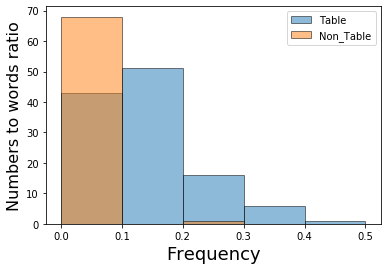

In [105]:
bins = [0.0,0.1,0.2,0.3,0.4,0.5]

plt.hist(table_pages.num_ratio, bins, alpha=0.5, label='Table',edgecolor='black')
plt.hist(non_table_pages.num_ratio, bins, alpha=0.5, label='Non_Table',edgecolor='black')
plt.xlabel('Frequency', fontsize=18)
plt.ylabel('Numbers to words ratio', fontsize=16)
plt.legend(loc='upper right')
plt.show()

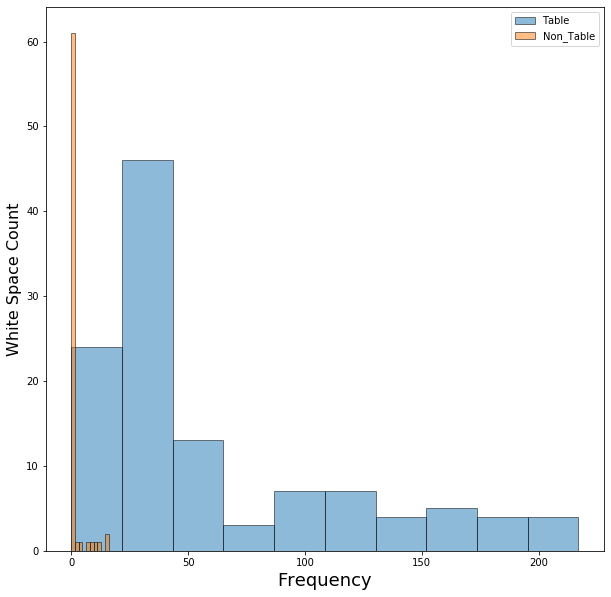

In [106]:
plt.figure(figsize=[10,10])
plt.hist(table_pages.white_space_count, alpha=0.5, label='Table',edgecolor='black')
plt.hist(non_table_pages.white_space_count, alpha=0.5, label='Non_Table',edgecolor='black')
plt.legend(loc='upper right')
plt.xlabel('Frequency', fontsize=18)
plt.ylabel('White Space Count', fontsize=16)
#plt.figure(figsize=(9,16))
plt.show()

In [107]:
table_pages.loc[table_pages['white_space_count'] < 20]

,Pg_num,num_count,total_length,white_space_count,new_line_count,num_ratio,has_table
46,47,69,1729,8,63,0.039907,True
50,51,58,700,17,41,0.082857,True
52,53,88,941,16,51,0.093518,True
58,59,49,649,10,39,0.075501,True
63,64,24,2991,0,103,0.008024,True
68,69,96,2454,13,99,0.039120,True
69,70,98,2860,16,99,0.034266,True
71,72,24,2943,0,104,0.008155,True
74,75,22,1030,3,100,0.021359,True
79,80,69,2815,4,102,0.024512,True


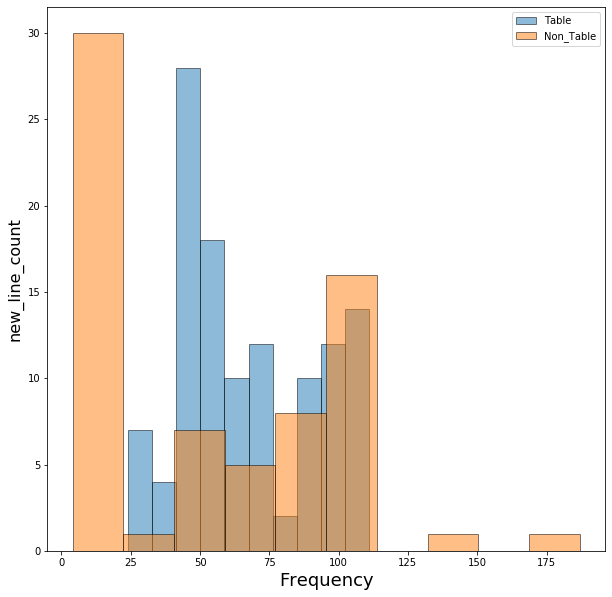

In [108]:
plt.figure(figsize=[10,10])
plt.hist(table_pages.new_line_count, alpha=0.5, label='Table',edgecolor='black')
plt.hist(non_table_pages.new_line_count, alpha=0.5, label='Non_Table',edgecolor='black')
plt.legend(loc='upper right')
plt.xlabel('Frequency', fontsize=18)
plt.ylabel('new_line_count', fontsize=16)
#plt.figure(figsize=(9,16))
plt.show()